# 1. Importing the necessary libraries

In [11]:
# Core data manipulation and analysis
import pandas as pd            # For handling structured data (DataFrames, CSVs, etc.)
import numpy as np             # For numerical operations, arrays, and linear algebra
import seaborn as sns          # For statistical data visualization (heatmaps, pairplots, etc.)
import os                      # For interacting with the operating system (paths, directories, files)
import operator                # For functional operators (useful in sorting, comparisons, etc.)
import matplotlib.pyplot as plt # For plotting and general-purpose data visualization

# Deep learning framework
import tensorflow as tf        # TensorFlow provides backend for deep learning and Keras API

# Keras model building
from keras import Input        # For defining model input layers
from keras.models import Sequential # Easy, linear stack model definition
from keras.models import Model      # For building complex/custom models (functional API)

# Keras layers for CNN architectures
from keras.layers import (
    Conv1D, Conv2D,             # Convolution layers (1D for sequences, 2D for images)
    Dense, Dropout,             # Fully connected layers and dropout (to reduce overfitting)
    BatchNormalization,         # Normalizes layer outputs → stabilizes/accelerates training
    Flatten,                    # Flattens multidimensional inputs to 1D
    MaxPooling2D,               # Downsamples feature maps (reduces spatial dimensions)
    Activation                  # Applies activation functions (ReLU, softmax, etc.)
)

# Data preprocessing utilities
from tensorflow.keras.utils import to_categorical           # Converts class vectors → one-hot encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
# Generates augmented image batches (rotations, flips, shifts, etc.) for training

# Model evaluation metrics
from sklearn.metrics import (
    confusion_matrix,           # Creates confusion matrix (classification performance)
    accuracy_score,             # Computes overall prediction accuracy
    ConfusionMatrixDisplay      # Visualizes the confusion matrix
)

In [13]:
# Import Keras (high-level deep learning API for building neural networks)
import keras  

# Import TensorFlow (the backend engine that runs Keras operations)
import tensorflow as tf  

# Print the installed Keras version (helps check compatibility issues)
print(f"Keras version: {keras.__version__}")  

# Print the installed TensorFlow version (important because Keras is bundled inside TF)
print(f"TensorFlow version: {tf.__version__}") 

Keras version: 3.6.0
TensorFlow version: 2.18.0


# 2. Importing and Preparing Weather Images

In [16]:
# Define the path to the folder containing the downloaded weather image dataset.
# `os.listdir(path)` lists all the subfolders inside this directory 
# (e.g., categories like 'sunny', 'cloudy', 'rainy', etc.).
# Printing the folder names helps confirm that the dataset was downloaded correctly and that the images are organized by category.
path = r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Specialization\Part 2\Exercise 2.5\archive\Multi-class Weather Dataset' 
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [20]:
# Create an ImageDataGenerator to preprocess the dataset:
# - `rescale=1/255`: normalizes pixel values to the [0,1] range (improves training stability).
# - `validation_split=0.2`: reserves 20% of the dataset for validation/testing.

# Define the training data generator:
# - Loads images directly from the dataset directory (`path`).
# - Resizes each image to 250x250 pixels (ensures consistent input shape for the CNN).
# - Processes images in batches of 12.
# - `subset='training'` ensures this generator only uses the 80% training portion.

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

# Define the validation/test data generator:
# - Uses the same preprocessing steps as training.
# - `subset='validation'` ensures this generator only uses the 20% validation portion.

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [22]:
# Define a Convolutional Neural Network (CNN) for classifying weather images

# Input layer:
# - Accepts images of size 250x250 pixels with 3 color channels (RGB)
inputs = Input(shape=(250, 250, 3))

# First convolutional block:
# - Conv2D with 32 filters, 5x5 kernel, ReLU activation extracts low-level features like edges
# - MaxPooling2D with 3x3 pool size reduces spatial dimensions, retaining important features
x = Conv2D(32, (5,5), activation='relu')(inputs)
x = MaxPooling2D(3,3)(x)

# Second convolutional block:
# - Conv2D with 64 filters for more complex features
# - MaxPooling2D reduces dimensionality again
x = Conv2D(64, (5,5), activation='relu')(x)
x = MaxPooling2D((3,3))(x)

# Third convolutional block:
# - Conv2D with 128 filters for even higher-level features
# - MaxPooling2D to downsample
x = Conv2D(128, (5,5), activation='relu')(x)
x = MaxPooling2D(3,3)(x)

# Flatten the 3D feature maps to 1D vector for fully connected layers
x = Flatten()(x)

# Dropout layer:
# - Randomly drops 50% of neurons to prevent overfitting
# - Seed ensures reproducibility
x = Dropout(0.5, seed=5)(x)

# Fully connected dense layer:
# - 128 neurons with ReLU activation to learn high-level combinations of features
x = Dense(128, activation='relu')(x)

# Output layer:
# - 4 neurons (one per weather class)
# - Softmax activation outputs class probabilities
outputs = Dense(4, activation='softmax')(x)

# Define the CNN model with specified inputs and outputs
model: Model = Model(inputs=inputs, outputs=outputs)

# 3. Model Compilation and Training

In [28]:
# Compile and train the CNN model for multi-class classification
model.compile(
    optimizer="Adam",                      # Optimizer: Adam for efficient gradient descent
    loss="categorical_crossentropy",       # Loss function: Categorical Crossentropy for multi-class classification
    metrics=["accuracy"]                   # Track accuracy during training
)

# Fit the model on the training data
model.fit(
    train_generator,                                    # Generator providing batches of training images
    epochs=16,                                          # Number of times the model iterates over the entire dataset
    steps_per_epoch=train_generator.n // train_generator.batch_size,  # Number of batches per epoch
    validation_data=test_generator,                     # Generator providing validation images
    validation_steps=test_generator.n // test_generator.batch_size    # Number of validation batches per epoch
)

Epoch 1/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - accuracy: 0.8295 - loss: 0.4991 - val_accuracy: 0.7685 - val_loss: 0.8659
Epoch 2/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.1929 - val_accuracy: 0.8750 - val_loss: 0.3223
Epoch 3/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 269ms/step - accuracy: 0.8510 - loss: 0.4159 - val_accuracy: 0.8611 - val_loss: 0.3711
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.2018 - val_accuracy: 0.8750 - val_loss: 0.3727
Epoch 5/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 269ms/step - accuracy: 0.8839 - loss: 0.2849 - val_accuracy: 0.5556 - val_loss: 1.4188
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5833 - loss: 1.2275 - val_accuracy: 0.7500 - val_loss: 1.3956
Epoch 7/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 304ms/step - accuracy: 0.7703 - loss: 0.5544 - val_accuracy: 0.7917 - val_loss: 0.5163
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.5936 - val_accuracy: 1.0000

# 4. Results

In [31]:
# Convert the model's training history into a pandas DataFrame
# This allows easy inspection, manipulation, and plotting of metrics like loss and accuracy over epochs
results = pd.DataFrame(model.history.history)

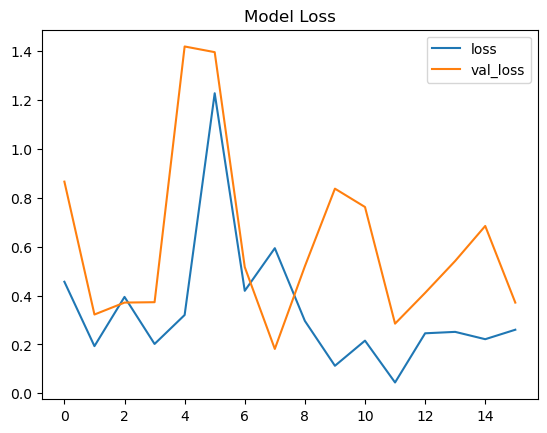

In [33]:
# Plot the training and validation loss over epochs to visualize model performance
# 'loss' is the loss on the training set, 'val_loss' is the loss on the validation set
# Saving the plot as 'loss.png' for later reference or reporting
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

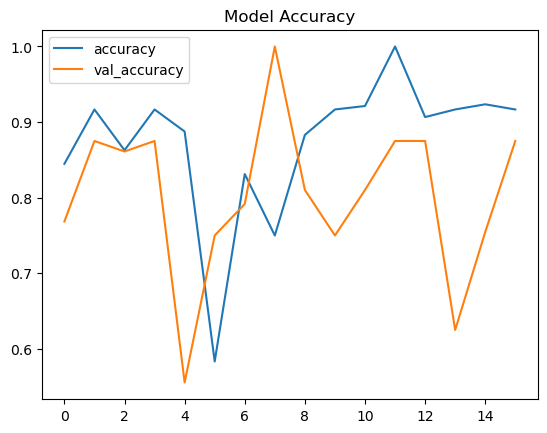

In [35]:
# Plot the training and validation accuracy over epochs to visualize how well the model is learning
# 'accuracy' is the accuracy on the training set, 'val_accuracy' is the accuracy on the validation set
# Saving the plot as 'accuracy.png' for later reference or reporting
results[['accuracy','val_accuracy']].plot(title='Model Accuracy')
plt.savefig('./accuracy.png')

In [37]:
# Print the final training and validation metrics after the last epoch
# This shows the model's performance on both training and validation data
# 'accuracy' and 'loss' are for the training set, 'val_accuracy' and 'val_loss' are for the validation set
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9166666865348816, Val_Accuracy: 0.875
Loss: 0.2600156366825104, Val_Loss: 0.3709799647331238


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step


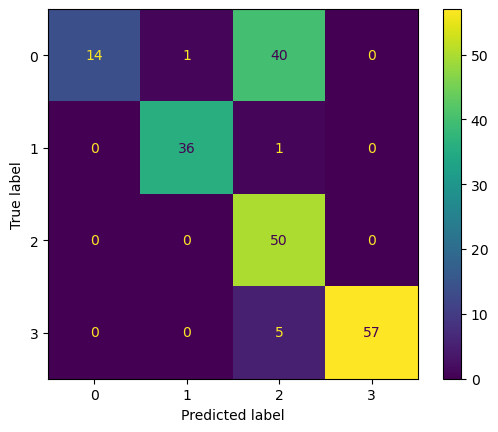

In [39]:
# Collect multiple batches of images from the test generator and display a confusion matrix

# Define the class labels corresponding to the weather categories
class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

# Number of batches to process; can be adjusted to include more or fewer images
n = 16  

# Get the first batch of images and labels from the test generator
image_batch, classes_batch = next(test_generator)

# Loop through the next n-1 batches and concatenate the images and labels
for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))  # Combine image arrays
    classes_batch = np.concatenate((classes_batch, temp[1]))  # Combine label arrays

# Predict the classes for all collected images using the trained model
y_predict = model.predict(image_batch)

# Compute the confusion matrix
# Convert one-hot encoded labels to class indices using np.argmax
cm = confusion_matrix(
    y_pred=[np.argmax(x) for x in y_predict], 
    y_true=[np.argmax(x) for x in classes_batch]
)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [41]:
# Function to display random images from the test set along with model predictions

def predict_one(model, num_images=None):
    """
    Predicts and visualizes a batch of images from the test generator.
    
    Parameters:
    model: Trained CNN model to use for predictions
    num_images: Number of images to display from the batch (default: all images in the batch)
    """
    
    # Get a batch of images and their true labels from the test generator
    image_batch, classes_batch = next(test_generator)
    
    # Use the model to predict classes for the batch
    predicted_batch = model.predict(image_batch)
    
    # Loop through each image in the batch (or up to num_images if specified)
    for k in range(0, image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]  # Get the image
        real_class = class_names[np.argmax(classes_batch[k])]  # True label
        predicted_class = class_names[np.argmax(predicted_batch[k])]  # Predicted label
        value_predicted = predicted_batch[k]  # Prediction probabilities
        isTrue = (real_class == predicted_class)  # Check if prediction is correct
        
        # Display the image with a title indicating correctness and class information
        plt.figure(k)
        plt.title(
            str("Correct Prediction" if isTrue else "Incorrect Prediction") + 
            ' - class: ' + real_class + 
            ' - predicted: ' + predicted_class + 
            str(value_predicted)
        )
        plt.axis('off')  # Hide axes
        
        # Save the image to file with class info in the filename
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)  # Show the image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


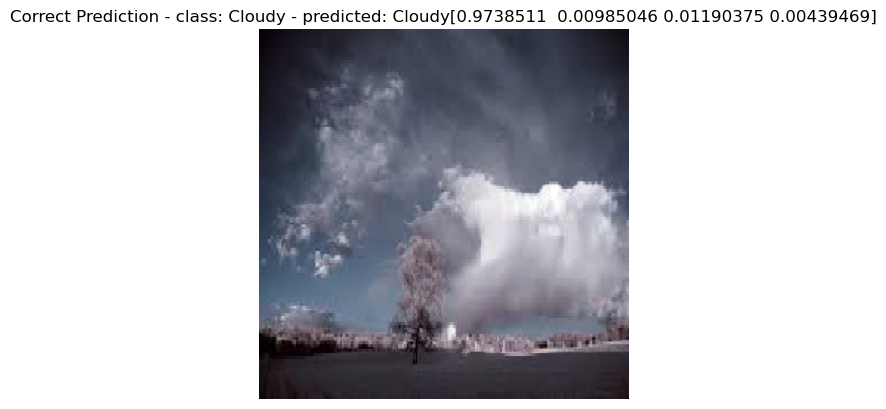

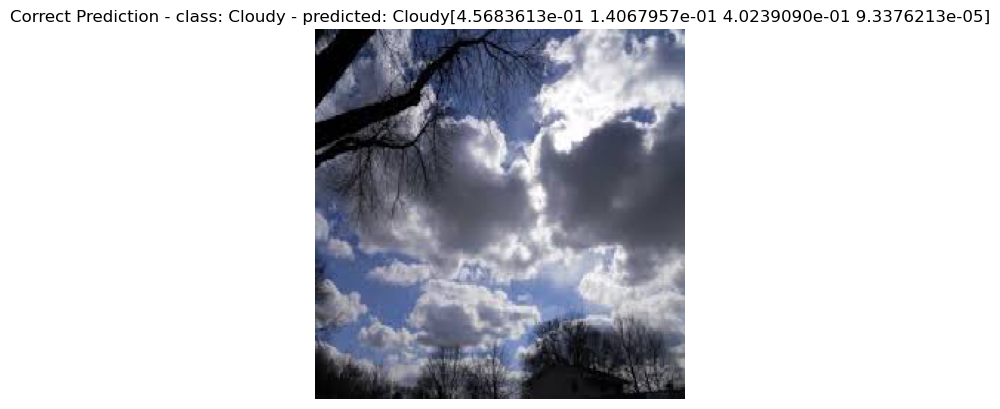

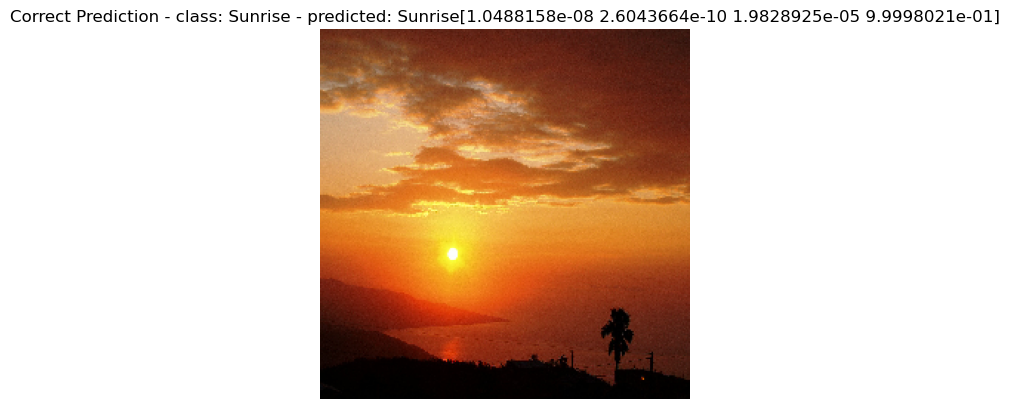

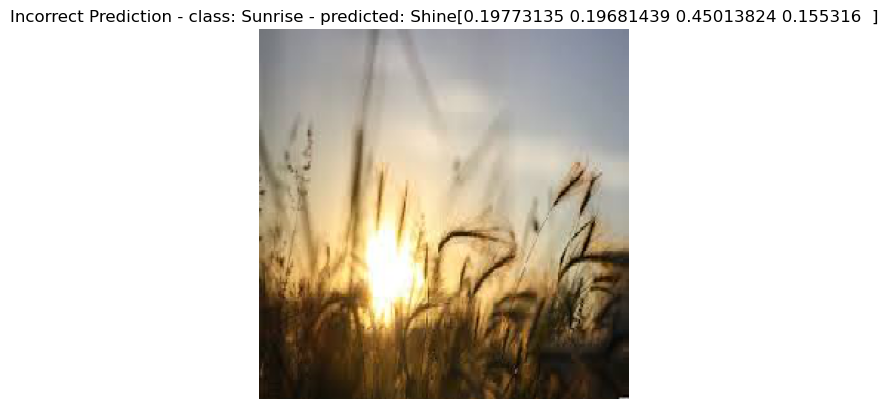

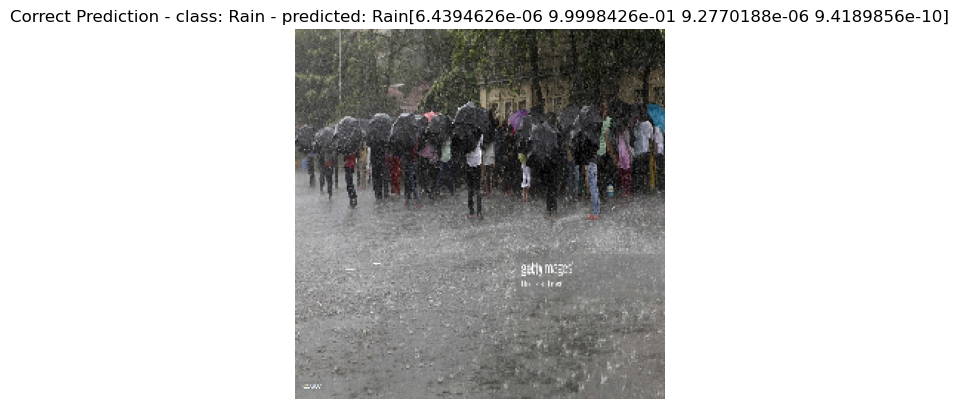

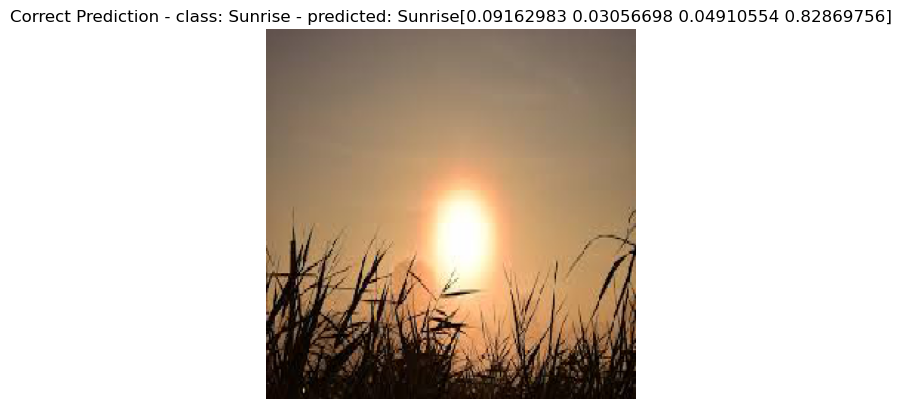

In [43]:
# Call the predict_one function to display a number of random test images with their predicted labels
# The argument specifies how many images to show from the test set
predict_one(model, 6)  # Display predictions for 6 images